## CLS/pos Testing

In [1]:
import torch

d_model = 512
seq_len = 500
batch_size = 32
cls = torch.nn.Parameter(torch.rand(1, d_model))
input = torch.zeros(batch_size, seq_len, d_model)

output = torch.column_stack([cls.expand(batch_size, -1, -1), input])

In [2]:
output.shape

torch.Size([32, 501, 512])

In [3]:
output[0, :, 500]

tensor([0.0309, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [4]:
import torch
from torch import nn, Tensor
import math
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 500):
        '''
        Positional encoding module based on: https://pytorch.org/tutorials/beginner/transformer_tutorial.html
        '''
        
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)
        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(1, max_len, d_model)

        pe[0, :, 0::2] = torch.sin(position * div_term)
        pe[0, :, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: Tensor) -> Tensor:
        """
        Arguments:
            x: Tensor, shape ``[batch_size, seq_len, embedding_dim]``
        """
        batch_size, seq_len, d_model = x.shape
        x = x + self.pe[:x.size(seq_len)]
        return self.dropout(x)

In [5]:
pos_enc = PositionalEncoding(d_model, 0, seq_len+1)

In [6]:
pos_enc.pe[0, :, 0]

tensor([ 0.0000e+00,  8.4147e-01,  9.0930e-01,  1.4112e-01, -7.5680e-01,
        -9.5892e-01, -2.7942e-01,  6.5699e-01,  9.8936e-01,  4.1212e-01,
        -5.4402e-01, -9.9999e-01, -5.3657e-01,  4.2017e-01,  9.9061e-01,
         6.5029e-01, -2.8790e-01, -9.6140e-01, -7.5099e-01,  1.4988e-01,
         9.1295e-01,  8.3666e-01, -8.8513e-03, -8.4622e-01, -9.0558e-01,
        -1.3235e-01,  7.6256e-01,  9.5638e-01,  2.7091e-01, -6.6363e-01,
        -9.8803e-01, -4.0404e-01,  5.5143e-01,  9.9991e-01,  5.2908e-01,
        -4.2818e-01, -9.9178e-01, -6.4354e-01,  2.9637e-01,  9.6380e-01,
         7.4511e-01, -1.5862e-01, -9.1652e-01, -8.3177e-01,  1.7702e-02,
         8.5090e-01,  9.0179e-01,  1.2357e-01, -7.6825e-01, -9.5375e-01,
        -2.6237e-01,  6.7023e-01,  9.8663e-01,  3.9593e-01, -5.5879e-01,
        -9.9976e-01, -5.2155e-01,  4.3616e-01,  9.9287e-01,  6.3674e-01,
        -3.0481e-01, -9.6612e-01, -7.3918e-01,  1.6736e-01,  9.2003e-01,
         8.2683e-01, -2.6551e-02, -8.5552e-01, -8.9

In [7]:
pos_enc.pe[0, :, 1]

tensor([ 1.0000,  0.5403, -0.4161, -0.9900, -0.6536,  0.2837,  0.9602,  0.7539,
        -0.1455, -0.9111, -0.8391,  0.0044,  0.8439,  0.9074,  0.1367, -0.7597,
        -0.9577, -0.2752,  0.6603,  0.9887,  0.4081, -0.5477, -1.0000, -0.5328,
         0.4242,  0.9912,  0.6469, -0.2921, -0.9626, -0.7481,  0.1543,  0.9147,
         0.8342, -0.0133, -0.8486, -0.9037, -0.1280,  0.7654,  0.9551,  0.2666,
        -0.6669, -0.9873, -0.4000,  0.5551,  0.9998,  0.5253, -0.4322, -0.9923,
        -0.6401,  0.3006,  0.9650,  0.7422, -0.1630, -0.9183, -0.8293,  0.0221,
         0.8532,  0.8999,  0.1192, -0.7711, -0.9524, -0.2581,  0.6735,  0.9859,
         0.3919, -0.5625, -0.9996, -0.5178,  0.4401,  0.9934,  0.6333, -0.3090,
        -0.9673, -0.7362,  0.1717,  0.9218,  0.8243, -0.0310, -0.8578, -0.8960,
        -0.1104,  0.7767,  0.9497,  0.2495, -0.6800, -0.9844, -0.3837,  0.5698,
         0.9994,  0.5102, -0.4481, -0.9944, -0.6264,  0.3174,  0.9695,  0.7302,
        -0.1804, -0.9251, -0.8193,  0.03

In [8]:
test = output + pos_enc.pe[:output.size(1)]

In [9]:
test.shape

torch.Size([32, 501, 512])

## X-Transformers

In [10]:
from x_transformers import Encoder, ContinuousTransformerWrapper
import torch

/home/cmu/anaconda3/envs/torch2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
max_seq_len = 500
dim_in = 1
dim_out = 1
model = ContinuousTransformerWrapper(
    max_seq_len = 500,
    dim_in = 1,
    dim_out = 1,
    use_abs_pos_emb = False,
    attn_layers = Encoder(
        dim = 64,
        depth = 3,
        heads = 4,
        rotary_pos_emb = True,
        attn_dropout = 0.1,
        ff_dropout = 0.1,
        attn_flash = True,
        )
    )

In [12]:
input = torch.randn(32, 400, 1)
out = model(input)

In [13]:
out.shape

torch.Size([32, 400, 1])

In [14]:
from models import BERT
import torch

model = BERT(d_in=1,
             d_out = 1,
             d_model = 64,
             nhead = 4,
             num_layers=3,
             )
test_input = torch.randn(32, 400, 1)
out = model(test_input)

AssertionError: Sequence length 400 is longer than maximum sequence length 200

In [ ]:
out.shape

torch.Size([32, 401, 1])

## Data Processing

In [ ]:
import torch
from torch.utils.data import DataLoader
from common.utils import HDF5Dataset
from equations.PDEs import *
from models import BERT
from sklearn import preprocessing

/home/cmu/anaconda3/envs/torch2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def standardScale(input):
    '''
    Standardize input data along d_in
    Input is in shape (batch_size, seq_len, d_in)
    '''
    x = torch.clone(input)
    m = x.mean(2, keepdim=True)
    s = x.std(2, unbiased=False, keepdim=True)
    x -= m
    x /= s
    return x

In [ ]:
device = 'cuda'
pde = CE(device=device)
path = "/home/cmu/anthony/gpt-mp-solver/data/CE_train_E3.h5"
base_resolution = (250, 100)
super_resolution = (250, 200)
batch_size = 16
dataset = HDF5Dataset(path, pde=pde, mode="train", base_resolution=base_resolution, super_resolution=super_resolution)
dataloader = DataLoader(dataset, batch_size=batch_size, num_workers=4, shuffle=True)

In [ ]:
u_base, u_super, x, variables = next(iter(dataloader))

In [ ]:
u_super_scaled = standardScale(u_super)

In [ ]:
import torch
from models import BERT
model = BERT(d_in=1,
             d_out = 1,
             d_model = 64,
             nhead = 4,
             num_layers=3,
             segment_len = 100,
             num_segments = 2,
             )
input = torch.randn(16, 200, 1)
out = model(input)

/home/cmu/anaconda3/envs/torch2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
out.shape

torch.Size([16, 203, 1])

In [ ]:
input = torch.randn(16, 200, 1)
out = model(input)

In [ ]:
out.shape

torch.Size([16, 203, 1])

## Masking

In [ ]:
import math
from functools import reduce

import torch
from torch import nn
import torch.nn.functional as F
seq = torch.randn(16, 203)
mask_token_id = 0.
mask_prob = 0.15
replace_prob = 0.9
random_token_prob = 0.1
num_tokens = 203
mask_ignore_idx = [0, 102, 203]

In [ ]:

def prob_mask_like(t, prob):
    return torch.zeros_like(t).float().uniform_(0, 1) < prob

def mask_with_idx(t, token_idx):
    mask = torch.full_like(t, False, dtype=torch.bool)
    for idx in token_idx:
        mask[:, idx] = torch.full_like(t[:, idx], True, dtype=torch.bool)
    return mask

def get_mask_subset_with_prob(mask, prob):
    batch, seq_len, device = *mask.shape, mask.device
    # Number of tokens to mask
    max_masked = math.ceil(prob * seq_len)

    # Number of tokens to ignore in each sequence
    num_tokens = mask.sum(dim=-1, keepdim=True)
    mask_excess = (mask.cumsum(dim=-1) > (num_tokens * prob).ceil())
    mask_excess = mask_excess[:, :max_masked]

    rand = torch.rand((batch, seq_len), device=device).masked_fill(~mask, -1e9)
    _, sampled_indices = rand.topk(max_masked, dim=-1)
    sampled_indices = (sampled_indices + 1).masked_fill_(mask_excess, 0)

    new_mask = torch.zeros((batch, seq_len + 1), device=device)
    new_mask.scatter_(-1, sampled_indices, 1)
    return new_mask[:, 1:].bool()

In [ ]:
#do not mask [pad] tokens, or any other tokens in the tokens designated to be excluded ([cls], [sep])
# also do not include these special tokens in the tokens chosen at random

no_mask = mask_with_idx(seq, mask_ignore_idx)
mask = get_mask_subset_with_prob(~no_mask, mask_prob)

# mask input with mask tokens with probability of `replace_prob` (keep tokens the same with probability 1 - replace_prob)

masked_seq = seq.clone().detach()

# derive labels to predict

labels = seq.masked_fill(~mask, mask_token_id)

# if random token probability > 0 for mlm

if random_token_prob > 0:
    assert num_tokens is not None, 'num_tokens keyword must be supplied when instantiating MLM if using random token replacement'
    random_token_prob = prob_mask_like(seq, random_token_prob)
    random_tokens = torch.randint(0, num_tokens, seq.shape, device=seq.device)
    random_no_mask = mask_with_idx(random_tokens, mask_ignore_idx)
    random_token_prob &= ~random_no_mask
    masked_seq = torch.where(random_token_prob, random_tokens, masked_seq)

    # remove tokens that were substituted randomly from being [mask]ed later
    mask = mask & ~random_token_prob

# [mask] input

replace_prob = prob_mask_like(seq, replace_prob)
masked_seq = masked_seq.masked_fill(mask * replace_prob, mask_token_id)

In [1]:
from MaskedWrapper import MaskedWrapper
from models import BERT
import torch
model = BERT(d_in=1,
             d_out = 1,
             d_model = 64,
             nhead = 4,
             num_layers=3,
             segment_len = 100,
             num_segments = 5,
             )
MLM = MaskedWrapper(model)

/home/cmu/anaconda3/envs/torch2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
input = torch.randn(16, 500, 1)
loss, mask = MLM(input)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       grad_fn=<SelectBackward0>)
tensor([-8.2641e-01, -9.1479e-01, -2.4394e-02, -5.2015e-02,  8.1097e-01,
         1.0177e+00, -7.1668e-01,  9.5331e-01,  9.8821e-01, -4.8355e-01,
        -7.8428e-01,  6.0169e-01, -8.7012e-01, -4.6241e-01, -6.4144e-01,
         3.7788e-01,  8.4563e-01,  2.7089e-01, -7.6964e-01,  3.2769e-01,
         7.6539e-01, -8.9367e-01, -5.3210e-01,  5.5344e-01,  1.1061e-01,
         4.5869e-01, -3.7061e-01,  1.6485e-01,  7.5762e-01,  1.0917e+00,
        -9.1133e-01, -2.9503e-01, -9.0008e-01,  1.0691e+00,  1.0299e-01,
        -6.1352e-01, -4.4966e-01, -5.5695e-01, -6.7554e-04, -8.4171e-03,
        -5.0920e-01, -6.2312e-01,  4.9703e-01,  9.3564e-01, -3.0397e-01,
        -3.1682e-01,  3.8386

In [13]:
torch.sum(mask)

tensor(1253)

In [4]:
out = model(input)

In [5]:
out.shape

torch.Size([16, 506, 1])

In [8]:
out[0, :].squeeze()

tensor([ 0.6367,  0.4102,  0.4326,  0.5230,  0.7394,  0.6725,  0.4256,  0.3523,
         0.6755,  0.6972,  0.2390,  0.5041,  0.4955,  0.4058,  0.7145,  0.7367,
         0.6110,  0.3026,  0.5798,  0.5576,  0.3871,  0.5660,  0.6587,  0.4555,
         0.6652,  0.5678,  0.3656,  0.7427,  0.3931,  0.1137,  0.5780,  0.1938,
         0.5714,  0.5813,  0.5314,  0.7061,  0.5116,  0.5314,  0.5401,  0.7282,
         0.1885,  0.5014,  0.5654,  0.7972,  0.2318,  0.5852,  0.5807,  0.6242,
         0.6173,  0.8606,  0.5400,  0.1741,  0.3808,  0.6151,  0.4466,  0.5256,
         0.6700,  0.7732,  0.4764,  0.1324,  0.3914,  0.6021,  0.2949,  0.4259,
         0.5076,  0.6391,  0.7583,  0.6426,  0.5495,  0.6039,  0.6814,  0.5541,
         0.7716,  0.4652,  0.4882,  0.3785,  0.5631,  0.4156,  0.4428,  0.6821,
         0.4472,  0.6484,  0.4822,  0.5754,  0.5664,  0.6311,  0.3701,  0.7300,
         0.7454,  0.3136,  0.6521,  0.6661,  0.2643,  0.4700,  0.5318,  0.7134,
         0.2350,  0.2917,  0.2831,  0.46

In [3]:
cls_token = torch.nn.Parameter(torch.zeros(1, 64))
input2 = torch.randn(16, 500, 64)
test = torch.column_stack([cls_token.expand(16, -1, -1), input2])

In [5]:
test[0, 0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       grad_fn=<SelectBackward0>)

In [15]:
input[mask].shape

torch.Size([1253])

## Visualization

In [6]:
from common.utils import HDF5Dataset
from torch.utils.data import DataLoader
from equations.PDEs import *
import random
import argparse
from MaskedWrapper import MaskedWrapper
from MaskedWrapper import mask_seq
from models import BERT
from common.utils import process_dict
import matplotlib.pyplot as plt
from train_bert import get_data

def prepare_data(path, pde, args, mode='train'):
    dataset = HDF5Dataset(path, pde=pde, mode=mode, base_resolution=args.base_resolution, super_resolution=args.super_resolution)
    shuffle = False
    if(mode == 'train'):
         shuffle = True
    dataloader = DataLoader(dataset, batch_size=args.batch_size, num_workers=4, shuffle=shuffle)
    return dataloader
parser = argparse.ArgumentParser(description='Train an PDE solver')

# PDE
parser.add_argument('--experiment', type=str, default='',
                    help='Experiment for PDE solver should be trained: [E1, E2, E3, WE1, WE2, WE3]')

# BERT parameters
parser.add_argument('--batch_size', type=int, default=16,
        help='Number of samples in each minibatch')
parser.add_argument('--num_epochs', type=int, default=1,
        help='Number of training epochs')
parser.add_argument('--d_in', type=int, default=1,
        help='Input dimension of BERT')
parser.add_argument('--d_out', type=int, default=1,
        help='Output dimension of BERT')
parser.add_argument('--d_model', type=int, default=512,
        help='Model dimension of BERT')
parser.add_argument('--nhead', type=int, default=16,
        help='Number of heads in BERT')
parser.add_argument('--num_layers', type=int, default=4,
        help='Number of layers in BERT')
parser.add_argument('--segment_len', type=int, default=100,
        help='Length of each PDE segment')
parser.add_argument('--num_segments', type=int, default=5,
        help='Number of PDE timesteps/segments')
parser.add_argument('--mask_prob', type=float, default=0.25,
        help='Probability to mask out a token')
parser.add_argument('--replace_prob', type=float, default=0.9,
        help='Probability to replace a masked token with 0')
parser.add_argument('--random_token_prob', type=float, default=0.1,
        help='Probability to replace a masked token with a random token')
parser.add_argument('--min_lr', type=float, default=1e-4,
        help='Minimum learning rate')
parser.add_argument('--max_lr', type=float, default=1e-3,
        help='Maximum learning rate')
parser.add_argument('--beta1', type=float, default=0.9,
        help='Adam beta1')
parser.add_argument('--beta2', type=float, default=0.98,
        help='Adam beta2')
parser.add_argument('--pct_start', type=float, default=0.1,
        help='Percentage of training to increase learning rate')


# Base resolution and super resolution
parser.add_argument('--base_resolution', type=lambda s: [int(item) for item in s.split(',')],
        default=[250, 100], help="PDE base resolution on which network is applied")
parser.add_argument('--super_resolution', type=lambda s: [int(item) for item in s.split(',')],
        default=[250, 200], help="PDE super resolution for calculating training and validation loss")

args = parser.parse_args("")
device = 'cuda'
pde = CE(device=device)
train_string = "/home/cmu/anthony/gpt-mp-solver/data/largeCE_train_E3.h5"
train_loader = prepare_data(train_string, pde, args, mode='train')

pde.tmin = train_loader.dataset.tmin
pde.tmax = train_loader.dataset.tmax
pde.grid_size = args.base_resolution
pde.dt = train_loader.dataset.dt

t_res, x_res = args.base_resolution

bert = BERT(d_in=args.d_in,
            d_model = args.d_model,
            nhead = args.nhead,
            num_layers= args.num_layers,
            segment_len = args.segment_len,
            num_segments = args.num_segments,
            dropout = 0,
            )

reconstruction_net = nn.Linear(in_features=args.d_model, out_features=args.d_in)
variable_net = nn.Linear(in_features=args.d_model, out_features=3)

model = MaskedWrapper(net=bert,
                        reconstruction_net=reconstruction_net,
                        variable_net=variable_net,
                        gamma = .1,
                        mask_prob = args.mask_prob,
                        replace_prob = args.replace_prob,
                        random_token_prob = args.random_token_prob).to(device)
                        

In [ ]:
save_path = "/home/cmu/anthony/gpt-mp-solver/bert/models/BERT_E3_time1126059.pt"
checkpoint = process_dict(torch.load(save_path))
model.load_state_dict(checkpoint)

In [ ]:
valid_string = "/home/cmu/anthony/gpt-mp-solver/data/largeCE_valid_E3.h5"
valid_loader = prepare_data(valid_string, pde, args, mode='valid')

In [ ]:
u_base, u_super, x, variables = next(iter(valid_loader))

In [39]:
from PDETokenizer import PDETokenizer
tokenizer = PDETokenizer(num_tokens=500, nx=100)

In [44]:
tw = 25
u_window = u_super[:, :tw, :]
batch_size, num_segments, nx = u_window.shape
num_tokens = 500
u_tokens = tokenizer.forward(u_window)
segment_len = int(num_tokens/tw)
d_in = int(num_segments*nx/num_tokens)

bert_new = BERT(d_in=d_in,
            d_out = d_in,
            d_model = 64,
            nhead = 4,
            num_layers= 2,
            segment_len = segment_len,
            num_segments = num_segments,
            )

In [45]:
token_embeddings = bert_new.token_embedding(u_tokens)

In [51]:
bert_new(u_tokens).shape

torch.Size([16, 526, 5])

In [46]:
model_new = MaskedWrapper(net=bert_new,
                        mask_prob = args.mask_prob,
                        replace_prob = args.replace_prob,
                        random_token_prob = args.random_token_prob)

In [47]:
model_new(u_tokens)

tensor(0.5731, grad_fn=<MseLossBackward0>)

In [7]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

net.cls_token tensor([[-3.9493e-01,  5.6739e-01,  8.0509e-01, -2.6895e-01, -1.1555e-02,
         -1.4903e-01,  9.8577e-01,  1.2432e+00, -1.4312e+00, -1.9768e-01,
         -3.9830e-01,  1.4422e+00,  1.0643e+00,  8.1779e-01,  2.7460e+00,
          5.0461e-01,  1.0805e+00, -9.9243e-01,  6.1470e-01, -1.1921e+00,
         -5.4791e-01,  7.9165e-01, -1.2532e+00,  1.1765e-01,  1.2106e+00,
         -1.4858e+00, -7.0276e-02, -1.4333e+00,  2.1008e+00, -3.2155e-01,
         -2.1411e+00,  1.7159e+00,  8.1575e-01, -5.5761e-01,  7.8487e-01,
         -1.6516e+00,  3.8511e-01, -7.4534e-01,  3.5296e-01,  8.8112e-01,
          2.1863e+00, -1.2532e+00,  5.9049e-01, -1.9530e-01,  1.9610e+00,
         -4.4843e-02, -6.1732e-02, -1.8399e+00, -2.0543e+00, -1.1872e+00,
          3.1225e+00, -9.8775e-01,  2.7044e-01,  8.2043e-01,  9.1638e-02,
         -4.6867e-02,  1.5438e+00,  9.8979e-01, -4.5425e-01,  1.6489e+00,
         -1.3843e+00,  1.0792e+00,  1.3913e+00, -4.8430e-01, -6.5015e-02,
          1.1659e+00,  8

In [28]:
bert.sep_token.shape

torch.Size([1, 512])

In [24]:
token_embeddings[0, :22, 0]

tensor([ 0.0000,  1.0754,  0.5295, -0.2044, -0.8299, -1.0955, -0.8924, -0.2970,
         0.4581,  1.0742,  1.3026,  1.0415,  0.3765, -0.4507, -1.1341, -1.4204,
        -1.2053, -0.5734,  0.2349,  0.9153,  1.2167,  0.0000],
       grad_fn=<SelectBackward0>)

In [42]:
d_in

5

In [43]:
out_new = bert_new(u_tokens)

In [44]:
out_new.shape

torch.Size([16, 526, 5])

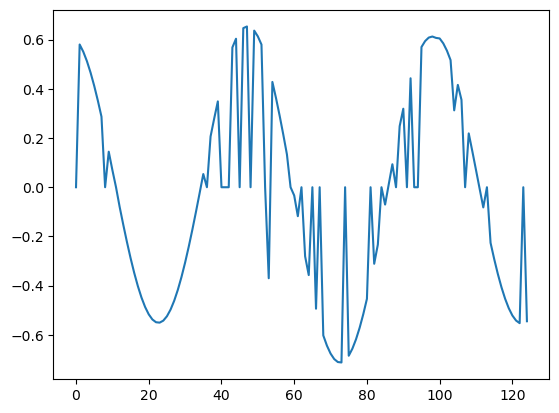

In [32]:
u_mask = out_mask[0, :25, :]
u_mask = torch.flatten(u_mask, start_dim=0, end_dim=1)
x_space = torch.arange(len(u_mask))
plt.plot(x_space, u_mask)

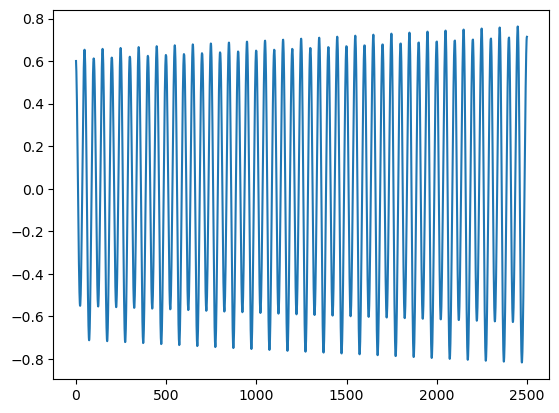

In [31]:
u_test = out[0, :, :]
u_test = torch.flatten(u_test, start_dim=0, end_dim=1)
x_space = torch.arange(len(u_test))
plt.plot(x_space, u_test)

In [171]:
u_base, u_super, x, variables = next(iter(valid_loader))
idx = 1
t_res, x_res = args.base_resolution
tw = args.num_segments
batch_size = args.batch_size

steps = [t for t in range(0, t_res - tw)]
data = get_data(u_super, steps, tw)
data = data.to(device)
data_idx = data[idx, :, :].unsqueeze(0)
x_pred, x_orig, x_masked = model(data_idx, mode = 'test')

Text(0.5, 1.0, 'Original')

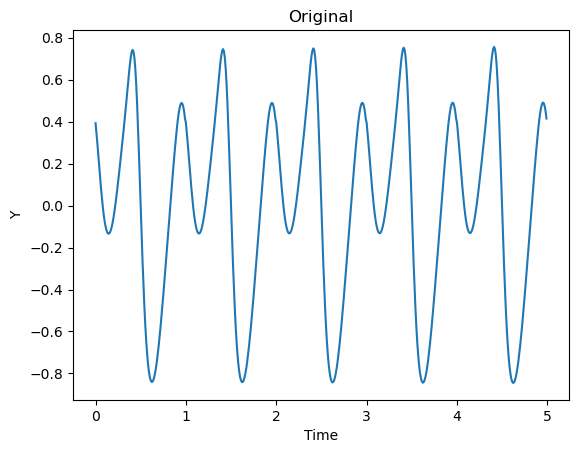

In [172]:
import torch
x_space = torch.arange(500)/100
plt.plot(x_space, x_orig.squeeze().cpu().detach().numpy())
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Original")

Text(0.5, 1.0, 'Masked')

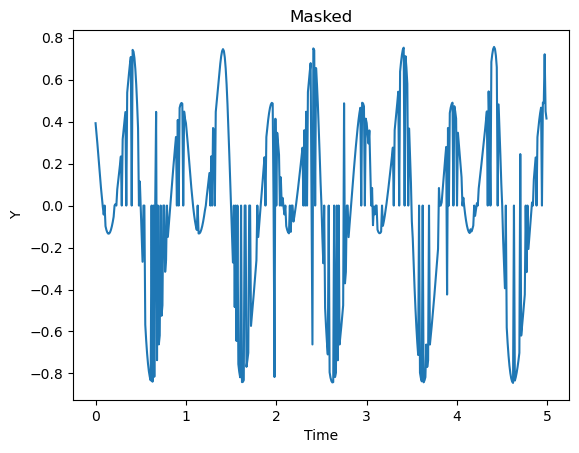

In [173]:
plt.plot(x_space, x_masked.squeeze().cpu().detach().numpy())
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Masked")

Text(0.5, 1.0, 'Reconstructed')

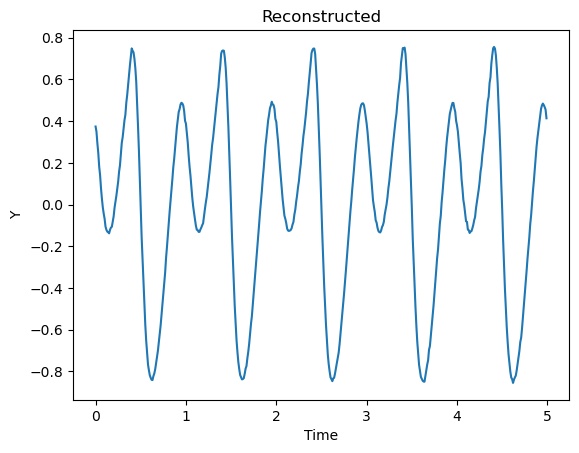

In [174]:
plt.plot(x_space, x_pred.squeeze().cpu().detach().numpy())
plt.xlabel("Time")
plt.ylabel("Y")
plt.title("Reconstructed")

## Super-resolution

In [175]:
u_base, u_super, x, variables = next(iter(valid_loader))
idx = 0
t_res, x_res = args.base_resolution
tw = args.num_segments
batch_size = args.batch_size

steps = [t for t in range(0, t_res - tw)]
data = get_data(u_super, steps, tw)
data = data.to(device)
data_idx = data[idx, :, :].unsqueeze(0)

In [185]:
def downsample(x, scale_factor):
    '''
    Downsample x by scale_factor
    x is in shape (seq_len), return x in shape (seq_len/scale_factor)
    '''
    x = x.squeeze()
    seq_len = len(x)
    out = torch.zeros(seq_len//scale_factor)
    for i in range(seq_len):
        if(i % scale_factor != 0):
            out[i//scale_factor] = x[i]
            x[i] = 0
    return out, x

def plot_super(data_idx, scale_factor, mode='nearest'):
    data_downsampled, data_masked = downsample(data_idx, scale_factor)
    up = torch.nn.Upsample(scale_factor=scale_factor, mode=mode)
    if mode == 'bicubic' or mode == 'bilinear':
        data_upsampled = up(data_downsampled.unsqueeze(0).unsqueeze(1).unsqueeze(2))[:, :, 1, :]
    else:
        data_upsampled = up(data_downsampled.unsqueeze(0).unsqueeze(1))

    x_pred = model.net(data_masked.unsqueeze(0).unsqueeze(2))
    mask = data_masked==0
    x_pred = x_pred[:, 1:, :] # remove cls token
    x_pred = model.remove_sep(x_pred) # remove sep tokens

    plt.figure()
    plt.plot(torch.arange(len(data_downsampled.squeeze()))/50, data_downsampled.squeeze().cpu().detach().numpy())
    plt.xlabel("Time")
    plt.ylabel("Y")
    plt.title("Low Resolution")

    plt.figure()
    plt.plot(x_space, x_pred.squeeze().cpu().detach().numpy())
    plt.xlabel("Time")
    plt.ylabel("Y")
    plt.title("Super Resolution: BERT")

    plt.figure()
    plt.plot(x_space, data_upsampled.squeeze().cpu().detach().numpy())
    plt.xlabel("Time")
    plt.ylabel("Y")
    plt.title(f"Super Resolution: {mode}")

    x_pred = x_pred.cpu().detach()
    data_upsampled = data_upsampled.cpu().detach()
    data_idx = data_idx.cpu().detach()
    mask= mask.cpu().detach()

    loss_bert = torch.nn.functional.mse_loss(x_pred.squeeze()[mask], data_idx.squeeze()[mask])
    loss_interpolate = torch.nn.functional.mse_loss(data_upsampled.squeeze()[mask], data_idx.squeeze()[mask])

    print(f"Loss BERT: {loss_bert}")
    print(f"Loss Interpolate: {loss_interpolate}")
    

Loss BERT: 0.2540050276625197
Loss Interpolate: 0.24917079162328692


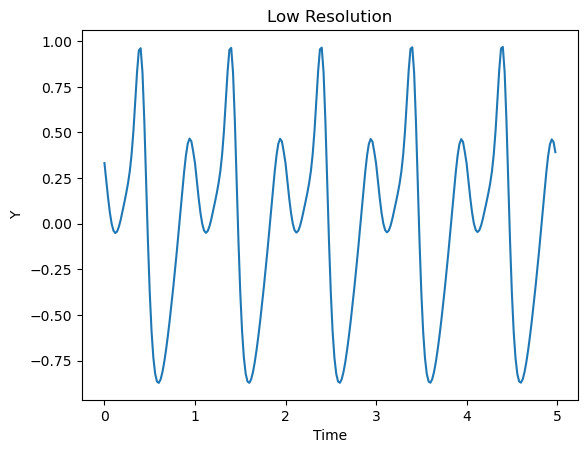

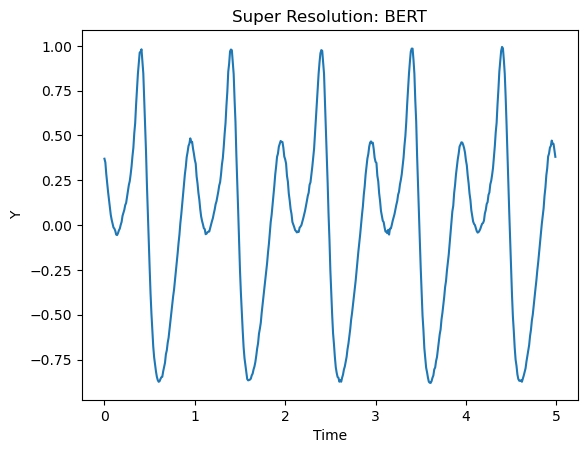

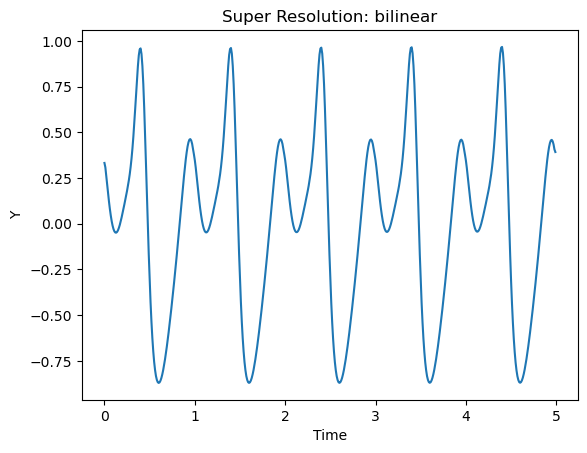

In [188]:
idx = 1
t_res, x_res = args.base_resolution
tw = args.num_segments
batch_size = args.batch_size

steps = [t for t in range(0, t_res - tw)]
data = get_data(u_super, steps, tw)
data = data.to(device)
data_idx = data[idx, :, :].unsqueeze(0)
plot_super(data_idx, 2, mode='bilinear')

In [76]:
def downsample(x, scale_factor):
    '''
    Downsample x by scale_factor
    x is in shape (batch, seq_len, idx), return x in shape (seq_len/scale_factor)
    '''
    x = x.squeeze()
    seq_len = len(x)
    out = torch.zeros(seq_len//scale_factor)
    for i in range(seq_len):
        if(i % scale_factor != 0):
            out[i//scale_factor] = x[i]
            x[i] = 0
    return out, x
    

In [ ]:
def super_error(u_super, scale_factor, mode="nearest"):
    data_downsampled, data_masked = downsample(u_super, scale_factor)
    up = torch.nn.Upsample(scale_factor=scale_factor, mode=mode)
    if mode == "bilinear" or mode == "bicubic":
        data_upsampled = up(data_downsampled.unsqueeze(0).unsqueeze(1).unsqueeze(2))[:, :, 1, :]
    else:
        data_upsampled = up(data_downsampled.unsqueeze(0).unsqueeze(1).unsqueeze(2))

    x_pred = model.net(data_masked.unsqueeze(0).unsqueeze(2))
    mask = data_masked>0
    x_pred = x_pred[:, 1:, :] # remove cls token
    x_pred = model.remove_sep(x_pred) # remove sep tokens

In [ ]:
modes = ["nearest", "linear", "bilinear", "bicubic"]
tres = 250
t_inner = 100
for i, mode in enumerate(modes):
    errors = []
    err_bert = []
    scale_factor = 2
    up = torch.nn.Upsample(scale_factor=scale_factor, mode=mode)
    for j in range(t_inner):
        print(f"step: {j}")
        steps = [t for t in range(0, t_res - tw)]
        for u_base, u_super, x, variables in valid_loader:
            data = get_data(u_super, steps, tw)
            e = super_error(data, scale_factor=scale_factor, mode=mode)
            errors.append(e)
    
        
    print(f"Mode: {mode}, Mean Error: {torch.mean(torch.stack(errors))}")